<a href="https://colab.research.google.com/github/TairCohen/personal-nutritionist-agent/blob/main/basic_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 20.8 MB/s eta 0:00:00


In [ ]:
# Install required packages first:
# pip install langgraph openai

import openai
from langgraph.graph import StateGraph, END
from typing import TypedDict, Optional
from IPython.display import Image, display
from langgraph.graph import StateGraph, START

In [ ]:
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.0/662.0 kB 31.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.76.2
    Uninstalling openai-1.76.2:
      Successfully uninstalled openai-1.76.2


In [ ]:
import openai
print(openai.__version__)


1.76.2


In [ ]:
from typing import TypedDict, Optional
from langgraph.graph import StateGraph, END
import openai
import base64
import asyncio
import os
import nest_asyncio
from pathlib import Path
import openai
from PIL import Image
import base64
from pathlib import Path
import pandas as pd

In [ ]:
nest_asyncio.apply()

# Securely enter API key
openai.api_key = "OPENAI_API_KEY"


In [ ]:

# טוענים תמונה מהזיכרון
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# קריאה לקובץ תמונה
image_path = Path("/content/2.jpg")
image_base64 = encode_image(image_path)

# מגדירים את ה-State
class ChatState(TypedDict):
    age: Optional[int]
    gender: Optional[str]
    weight: Optional[float]
    goal: Optional[str]
    meal_photo: Optional[str]  # שימי לב: str ולא bytes
    meal_analysis: Optional[str]

# פונקציות זרימה
def ask_age(state: ChatState):
    age = int(input("👤 Enter your age: "))
    return {"age": age}

def ask_gender(state: ChatState):
    gender = input("🚻 Enter your gender (male/female): ")
    return {"gender": gender}

def ask_weight(state: ChatState):
    weight = float(input("⚖️ Enter your weight (kg): "))
    return {"weight": weight}

def ask_goal(state: ChatState):
    print("🎯 Choose your goal:")
    print("1 - Weight Loss")
    print("2 - Muscle Gain")
    print("3 - Maintenance")
    choice = input("Enter 1/2/3: ")
    goal = {"1": "weight_loss", "2": "muscle_gain", "3": "maintenance"}.get(choice, "maintenance")
    return {"goal": goal}

def upload_meal_photo(state: ChatState):
    return {"meal_photo": image_base64}

def analyze_food_simple(image_base64):

    response = openai.ChatCompletion.create(
        model="gpt-4-turbo",
        messages=[
            {"role": "system", "content": "You are a nutrition expert who knows how to estimate the caloric values ​​of various dishes. You analyze a picture of a dish and estimate the weight in grams for each of the ingredients that make up the dish."},
            {"role": "user", "content": [
                {"type": "text", "text": "Give only a list of the ingredients that make up the dish in the picture and for each ingredient, give its weight in grams for the dish in the picture."},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"}}
            ]}
        ],
        max_tokens=500
    )
    return response["choices"][0]["message"]["content"]

def handle_meal_analysis(state: ChatState):
    analysis = analyze_food_simple(state["meal_photo"])
    print("\n🔎 Analysis Completed:")
    print(analysis)
    return {"meal_analysis": analysis}

# גרף
graph = StateGraph(ChatState)

graph.add_node("AskAge", ask_age)
graph.add_node("AskGender", ask_gender)
graph.add_node("AskWeight", ask_weight)
graph.add_node("AskGoal", ask_goal)
graph.add_node("UploadMealPhoto", upload_meal_photo)
graph.add_node("HandleMealAnalysis", handle_meal_analysis)

graph.set_entry_point("AskAge")
graph.add_edge("AskAge", "AskGender")
graph.add_edge("AskGender", "AskWeight")
graph.add_edge("AskWeight", "AskGoal")
graph.add_edge("AskGoal", "UploadMealPhoto")
graph.add_edge("UploadMealPhoto", "HandleMealAnalysis")
graph.add_edge("HandleMealAnalysis", END)

# מריצים
app = graph.compile()

result = app.invoke({})

print("\n🍽️ Final Meal Analysis:")
print(result["meal_analysis"])


KeyboardInterrupt: Interrupted by user

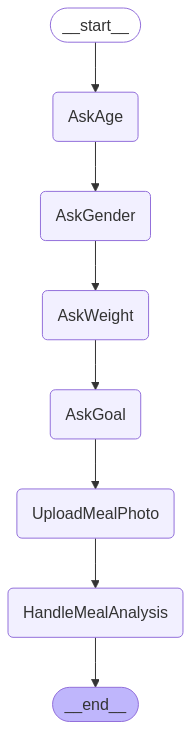

In [ ]:
from IPython.display import Image
# Show
display(Image(app.get_graph(xray=True).draw_mermaid_png()))